# Reviewer comments

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/Methlation


In [2]:
import NotebookImport
from Parallel.Age_HIV_Features import *

importing IPython notebook from Parallel/Age_HIV_Features

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


importing IPython notebook from Setup/MethylationAgeModels

importing IPython notebook from Setup/Read_HIV_Data

It would be useful to know how many of the CpGs associated with age (26,927), and HIV (81,361) are also strongly differentially methylated across cell-types. One could for example, plot a cell-type association p-value histogram for these sites using p-values from this Jaffe and Irizarry table: http://www.genomebiology.com/2014/15/2/R31/suppl/S3
If it is highly enriched for small p-values, I would be cautious about claiming that the cell type effects have been fully corrected for as the authors believe. 

In [3]:
dm_cell = pd.read_csv('./data/Jaffee_Supplementary_Table_2.csv', index_col=0,
                      low_memory=False, skiprows=[0])

#### HIV association with cell-type specific probes

In [4]:
g_hiv.value_counts()

False    391683
True      81361
dtype: int64

In [5]:
vv = features['HIV (BH)']

r_hiv = pd.DataFrame({c: fisher_exact_test(vv, dm_cell['p.value'] < c)
                      for c in [.1, .05,.01,.001,.0001,.000001]}).T
r_hiv.index.name = 'p-value cutoff'
count = pd.Series({c: sum(dm_cell['p.value'].ix[vv.index] < c)
                      for c in [.1, .05,.01,.001,.0001,.000001]}).T
r_hiv['count'] = count
r_hiv = r_hiv[['count','odds_ratio','p']]

In [6]:
r_hiv

,count,odds_ratio,p
p-value cutoff,,,
1.00e-06,88949,0.87,3.25e-41
1.00e-04,144460,0.86,7.09e-63
1.00e-03,183835,0.88,2.79e-52
1.00e-02,235900,0.94,2.52e-14
5.00e-02,285508,1.01,3.68e-01
1.00e-01,312476,1.05,3.23e-07


In [7]:
r_hiv = pd.DataFrame({c: fisher_exact_test(g_hiv, dm_cell['p.value'] < c)
                      for c in [.1, .05,.01,.001,.0001,.000001]}).T
r_hiv.index.name = 'p-value cutoff'
count = pd.Series({c: sum(dm_cell['p.value'].ix[g_hiv.index] < c)
                      for c in [.1, .05,.01,.001,.0001,.000001]}).T
r_hiv['count'] = count
r_hiv = r_hiv[['count','odds_ratio','p']]

In [8]:
r_hiv

,count,odds_ratio,p
p-value cutoff,,,
1.00e-06,88949,0.95,2.33e-08
1.00e-04,144460,0.98,1.80e-02
1.00e-03,183835,1.00,5.73e-01
1.00e-02,235900,1.06,3.35e-15
5.00e-02,285508,1.13,4.85e-47
1.00e-01,312476,1.16,5.79e-67


In [9]:
fc = ((dm_cell.CD4T_mean - dm_cell.CD8T_mean).abs() / 
      .5*(dm_cell.CD4T_mean + dm_cell.CD8T_mean))
r_hiv_fc = pd.DataFrame({p: fisher_exact_test(g_hiv, fc > c)
                      for p,c in fc.quantile([.05,.1,.25,.5,.75,.9,.95]).iteritems()}).T
r_hiv_fc

,odds_ratio,p
0.05,0.91,2.52e-07
0.10,0.78,1.52e-82
0.25,0.81,5.25e-117
0.50,0.85,2.12e-96
0.75,0.86,5.12e-61
0.90,0.77,2.74e-76
0.95,0.76,9.46e-46


#### Age association with cell-type specific probes

In [10]:
g_age.value_counts()

False    446117
True      26927
dtype: int64

In [11]:
r_age = pd.DataFrame({c: fisher_exact_test(g_age, dm_cell['p.value'] < c)
                      for c in [.1, .05,.01,.001,.0001,.000001]}).T
r_age.index.name = 'p-value cutoff'
count = pd.Series({c: sum(dm_cell['p.value'].ix[g_age.index] < c)
                      for c in [.1, .05,.01,.001,.0001,.000001]}).T
r_age['count'] = count
r_age = r_age[['count','odds_ratio','p']]

In [12]:
r_age

,count,odds_ratio,p
p-value cutoff,,,
1.00e-06,88949,2.56,0
1.00e-04,144460,3.54,0
1.00e-03,183835,4.28,0
1.00e-02,235900,5.50,0
5.00e-02,285508,6.45,0
1.00e-01,312476,6.94,0


In [13]:
count

1.00e-06     88949
1.00e-04    144460
1.00e-03    183835
1.00e-02    235900
5.00e-02    285508
1.00e-01    312476
dtype: int64

In [14]:
fc = ((dm_cell.CD4T_mean - dm_cell.CD8T_mean).abs() / 
      .5*(dm_cell.CD4T_mean + dm_cell.CD8T_mean))
r_age_fc = pd.DataFrame({p: fisher_exact_test(g_age, fc > c)
                      for p,c in fc.quantile([.05,.1,.25,.5,.75,.9,.95]).iteritems()}).T

count = pd.Series({p: sum(fc > c)
                      for p,c in fc.quantile([.05,.1,.25,.5,.75,.9,.95]).iteritems()})
r_age_fc['count'] = count
r_age_fc = r_age_fc[['count','odds_ratio','p']]
r_age_fc

,count,odds_ratio,p
0.05,433822,4.95,2.46e-283
0.10,410989,3.06,0.00e+00
0.25,342491,2.25,0.00e+00
0.50,228327,1.62,1.12e-308
0.75,114164,1.76,0.00e+00
0.90,45666,1.99,2.32e-311
0.95,22833,1.81,1.63e-123


It would be reassuring if the link between the HIV infection and aging signatures (from "Unsupervised analysis shows shared phenotypes of HIV and age") still hold when analysis is restricted to CpGs with no cell-type dependency (e.g. cell type composition p-value>0.1). 

In [15]:
df_hiv2 = df_hiv.ix[:, duration.index]
df_hiv2 = df_hiv2.dropna(1, how='all')

dd = logit_adj(df_hiv2)
m = dd.mean(1)
s = dd.std(1)
df_norm = dd.subtract(m, axis=0).divide(s, axis=0)

In [16]:
idx = ti(dm_cell['p.value'] > .1).intersection(ti(g_age))
len(idx)

1646

In [17]:
U,S,vH = frame_svd(df_norm.ix[probe_idx].ix[idx])
p = S ** 2 / sum(S ** 2)
p[:5]

array([ 0.12555382,  0.0939205 ,  0.04203538,  0.03512384,  0.02747315])

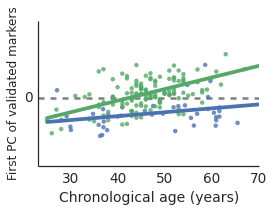

In [18]:
fig, ax = subplots(1,1, figsize=(4,3))
rr = 1*vH[0]
k = pred_c.index
hiv = duration != 'Control'
age = age

sns.regplot(*match_series(age.ix[k], rr.ix[ti(hiv==0)]),
            ax=ax, label='HIV+', ci=None)
sns.regplot(*match_series(age.ix[k], rr.ix[ti(hiv>0)]),
            ax=ax, label='Control', ci=None)
ax.set_ylabel('First PC of validated markers', size=12)
ax.set_xlabel('Chronological age (years)', size=14)

ax.set_yticks([0])
ax.axhline(0, ls='--', lw=2.5, color='grey', zorder=-1)
ax.set_xbound(23,70)
ax.set_ybound(-.25,.28)
prettify_ax(ax)
fig.tight_layout()

In [141]:
import statsmodels.api as sm

In [142]:
y = vH[0]
intercept = pd.Series(1, index=y.index)

X = pd.concat([intercept, age, hiv], axis=1, keys=['Intercept', 'age', 'HIV'])
X = X.dropna().ix[y.index]
m1 = sm.OLS(y, X).fit()

X = pd.concat([intercept, age, hiv, hiv*age], axis=1, keys=['Intercept', 'age', 
                                                            'HIV', 'int'])
X = X.dropna().ix[y.index]
m2 = sm.OLS(y, X).fit()

m2.compare_lr_test(m1)

(7.0503496130212397, 0.0079249782022338278, 1.0)

In [143]:
m1.pvalues

Intercept    2.99e-13
age          3.19e-09
HIV          1.13e-11
dtype: float64

In [144]:
m2.pvalues

Intercept    8.73e-04
age          4.17e-02
HIV          2.99e-01
int          8.75e-03
dtype: float64

In Figure 1A how many sites identified from EPIC as age associated were not identified in Hannum et al? This data would be more informative if represented as a Venn diagram to show the overlapping 26,927 sites between the two analyses.

In [202]:
rr1 = bhCorrection(p_vals.in_set_s1) < .01
rr1.value_counts()

False    411452
True      61592
dtype: int64

In [203]:
rr2 = bhCorrection(p_vals.in_set_s3) < .01
rr2.value_counts()

False    442224
True      30820
dtype: int64

In [204]:
fisher_exact_test(rr1, rr2)

odds_ratio    18.81
p              0.00
dtype: float64

<matplotlib_venn._venn2.Venn2 instance at 0x7f95eb2a3fc8>

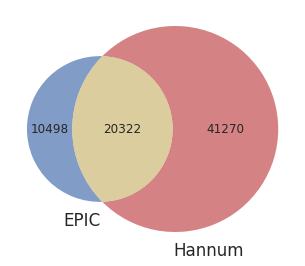

In [206]:
rr1.name = 'Hannum'
rr2.name = 'EPIC'
venn_pandas(rr1, rr2)

It seems as though the odds ratios for HIV and age are mostly opposite except in CpG islands and gene bodies. Wouldn't this argue for the effects of HIV and aging being separate except for at these two locations?

In [208]:
fisher_exact_test(g_age, g_hiv)

odds_ratio    1.29e+00
p             3.88e-59
dtype: float64

In [211]:
import Setup.DX_Imports as dx

importing IPython notebook from Setup/DX_Imports

In [215]:
by_annotation = pd.DataFrame({k: fisher_exact_test(g_age, g_hiv.ix[ti(v)])
                              for k,v in dx.probe_sets.iteritems()}).T

In [217]:
by_annotation.sort('odds_ratio')

,odds_ratio,p
Promoter,1.22,2.50e-08
Gene Body,1.24,4.04e-13
TSS,1.33,2.57e-26
DHS Site,1.46,8.45e-29
Enhancer,1.46,1.73e-26
PRC2,1.68,3.32e-81
CpG Island,1.70,9.32e-110


In [365]:
a2 = age[(age > 25) & (age < 69)]
d = pd.DataFrame({s: {c: pearson_pandas(v.ix[ti(study==s)], a2).rho
                      for c,v in cell_counts.iteritems()}
                  for s in ['s1','s3','HIV Control','HIV Long','HIV Short']})
d

,HIV Control,HIV Long,HIV Short,s1,s3
Bcell,-0.06,-0.20,-0.26,-0.12,0.08
CD4T,-0.14,0.03,-0.20,-0.02,0.03
CD8T,-0.25,0.01,0.05,-0.21,-0.13
Gran,0.21,0.01,-0.05,0.05,-0.06
Mono,0.20,-0.09,0.26,0.21,-0.04
NK,-0.11,0.10,0.24,0.08,0.16


In [358]:
a2 = age[(age > 25) & (age < 69)]
idx = ti(study.isin(['s1','HIV Control','s3']))
d = pd.Series({c: pearson_pandas(v.ix[idx], a2).rho
                      for c,v in cell_counts.iteritems()})
d

Bcell   -0.04
CD4T    -0.02
CD8T    -0.16
Gran     0.01
Mono     0.10
NK       0.10
dtype: float64

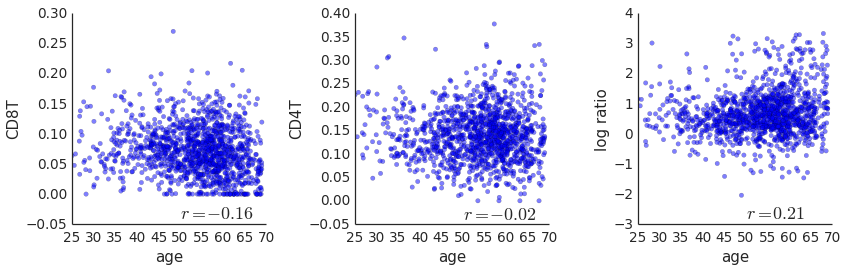

In [362]:
fig, axs = subplots(1,3, figsize=(12,4))

series_scatter(a2, cell_counts.CD8T.ix[idx], s=20, ax=axs[0], ann=None)
axs[0].annotate('$r={0:.2f}$'.format(d['CD8T']), (50, -.04), size=18)
series_scatter(a2, cell_counts.CD4T.ix[idx], s=20, ax=axs[1], ann=None)
axs[1].annotate('$r={0:.2f}$'.format(d['CD4T']), (50, -.04), size=18)
ratio = np.log((cell_counts.CD4T + .01) / (cell_counts.CD8T + .01))
ratio.name = 'log ratio'
series_scatter(a2.ix[idx], ratio.clip(-5,5), s=20, ax=axs[2], ann=None)
axs[2].annotate('$r={0:.2f}$'.format(pearson_pandas(ratio, a2).rho), 
                (50, -2.8), size=18)
for ax in axs:
    prettify_ax(ax)
    ax.set_xbound(25,70)
fig.tight_layout()